In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Definindo o Portfolio:

In [2]:
ativos = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'TAEE11.SA', 'EGIE3.SA', 'WEGE3.SA', 'ABEV3.SA', 'JBSS3.SA']

portfolio = pd.DataFrame()

for ativo in ativos:
    portfolio[ativo] = yf.download(ativo, period='5y')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Analisando o Portfolio:

In [3]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2018-04-11 to 2023-04-11
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PETR4.SA   1240 non-null   float64
 1   VALE3.SA   1240 non-null   float64
 2   ITUB4.SA   1240 non-null   float64
 3   TAEE11.SA  1239 non-null   float64
 4   EGIE3.SA   1240 non-null   float64
 5   WEGE3.SA   1240 non-null   float64
 6   ABEV3.SA   1240 non-null   float64
 7   JBSS3.SA   1240 non-null   float64
dtypes: float64(8)
memory usage: 87.2 KB


In [4]:
portfolio.tail()

,PETR4.SA,VALE3.SA,ITUB4.SA,TAEE11.SA,EGIE3.SA,WEGE3.SA,ABEV3.SA,JBSS3.SA
Date,,,,,,,,
2023-04-04,24.270000,78.040001,24.510000,35.180000,40.230000,39.630001,14.43,17.450001
2023-04-05,24.350000,76.889999,24.490000,35.180000,39.980000,38.750000,14.40,17.219999
2023-04-06,24.000000,76.750000,24.410000,35.049999,40.150002,38.610001,14.43,16.790001
2023-04-10,24.510000,78.230003,24.670000,33.950001,39.840000,38.389999,14.46,17.170000
2023-04-11,25.610001,82.650002,25.440001,33.900002,39.980000,38.950001,14.79,17.500000


## Plotagem dos Ativos usando "Linechart":

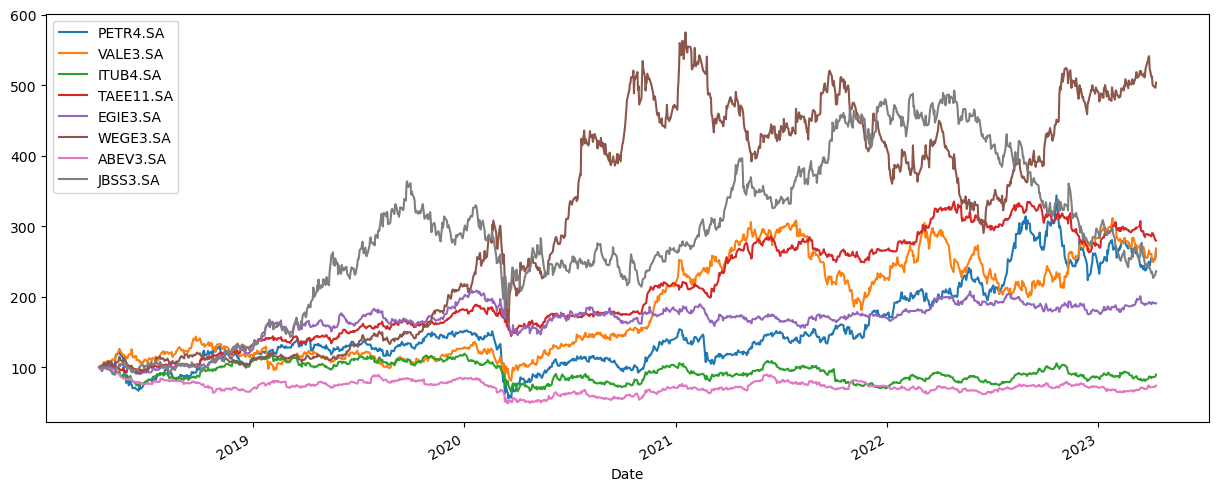

In [5]:
(portfolio / portfolio.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

## Calculando o Retorno do Portfolio:

In [6]:
# retorno diário (só serve como insumo produtivo da conta, não tem valor científico por si só)
retorno_d = (portfolio / portfolio.shift(1)) -1  # aplicação da fórmula: (pT/p0)*100
retorno_d.tail()

,PETR4.SA,VALE3.SA,ITUB4.SA,TAEE11.SA,EGIE3.SA,WEGE3.SA,ABEV3.SA,JBSS3.SA
Date,,,,,,,,
2023-04-04,-0.008983,-0.028265,0.019975,0.015296,0.014372,0.001010,0.006978,0.008671
2023-04-05,0.003296,-0.014736,-0.000816,0.000000,-0.006214,-0.022205,-0.002079,-0.013181
2023-04-06,-0.014374,-0.001821,-0.003267,-0.003695,0.004252,-0.003613,0.002083,-0.024971
2023-04-10,0.021250,0.019283,0.010651,-0.031384,-0.007721,-0.005698,0.002079,0.022632
2023-04-11,0.044880,0.056500,0.031212,-0.001473,0.003514,0.014587,0.022822,0.019220


In [7]:
# array com distribuição de pesos do portfolio
peso = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [8]:
# retorno anual
retorno_a = retorno_d.mean() * 251
# 251 dias úteis em média em SP
retorno_a

PETR4.SA     0.319921
VALE3.SA     0.283890
ITUB4.SA     0.036031
TAEE11.SA    0.230012
EGIE3.SA     0.161871
WEGE3.SA     0.401268
ABEV3.SA    -0.011890
JBSS3.SA     0.264954
dtype: float64

In [9]:
# calcula o produto do vetor ou matriz usando np.dot
pfolio_1 = str(round(np.dot(retorno_a, peso), 6) * 100) + ' %'
print("Com distribuição equânime dos recursos, temos um retorno anual médio de: " + pfolio_1)

Com distribuição equânime dos recursos, temos um retorno anual médio de: 21.0757 %


In [10]:
# Redistribuição de pesos com enfoque em distribuição de dividendos
peso_2 = np.array([0.025, 0.225, 0.225, 0.225, 0.125, 0.025, 0.125, 0.025])

In [11]:
pfolio_2 = str(round(np.dot(retorno_a, peso_2), 6) * 100) + ' %'
print(pfolio_2)

16.7136 %
